# <span style="color:Red">Markov</span>




In [2]:
import numpy as np
%pip install hmmlearn
from hmmlearn import hmm
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


#####  <span style="color:white">Simulamos los Datos</span>

In [3]:
import pandas as pd
data = pd.read_csv('data/returns_selected.csv')

fondo = 'LU0272423913'
returns = data[fondo].values.reshape(-1, 1)
returns = returns[:100]

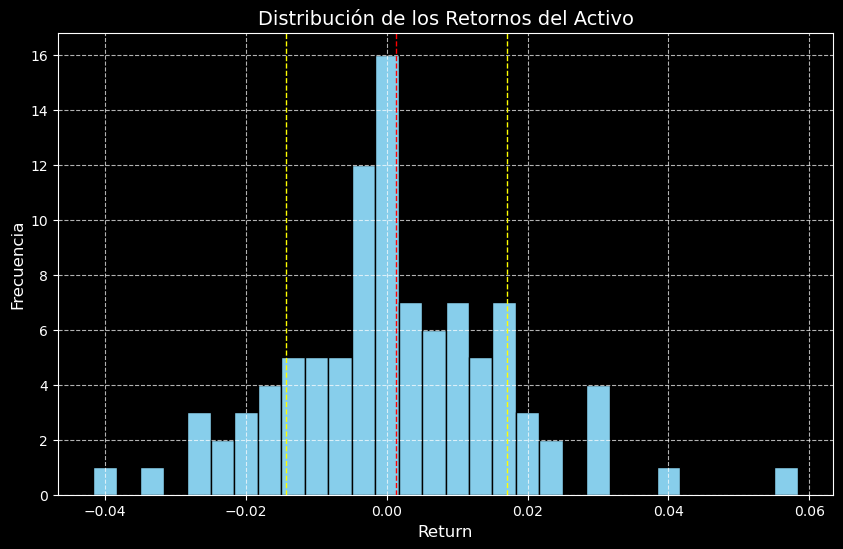

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=30, color='skyblue', edgecolor='black')


plt.xlabel('Return', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de los Retornos del Activo', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.axvline(returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(returns.mean() + returns.std(), color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(returns.mean() - returns.std(), color='yellow', linestyle='dashed', linewidth=1)


plt.show()



In [ ]:
n_samples = 100  
hidden_states = np.random.choice([0, 1, 2], size=n_samples)  

observations = np.array([
    np.random.normal(0.02, 0.01) if s == 0 else 
    np.random.normal(-0.01, 0.02) if s == 1 else 
    np.random.normal(0.0, 0.03) 
    for s in hidden_states
]).reshape(-1, 1)

In [ ]:
np.random.seed(42)


n_samples = 100


hidden_states = np.random.choice([0, 1, 2], size=n_samples, p=[0.4, 0.4, 0.2])

observations = returns



print("Estados Ocultos:", hidden_states[:10])  

print("Observaciones:", observations[:10])   


Estados Ocultos: [0 2 1 1 0 0 0 2 1 1]
Observaciones: [[-0.01498957]
 [-0.02291426]
 [-0.01109889]
 [-0.01348335]
 [-0.00113186]
 [ 0.        ]
 [-0.0252307 ]
 [-0.00232558]
 [ 0.00116347]
 [-0.00232829]]


In [ ]:

observations = np.array([1.0, 2.0, 3.0, 2.5, 1.5]).reshape(-1, 1)


model = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=42)


model.fit(observations)


predicted_states = model.predict(observations)


print("Matriz de Transición:")
print(model.transmat_)  
print("\nEstados Ocultos Predichos:")
print(predicted_states)

Fitting a model with 14 free scalar parameters with only 5 data points will result in a degenerate solution.


Matriz de Transición:
[[4.01529421e-36 1.00000000e+00 3.44367828e-54]
 [5.00000000e-01 1.22507472e-13 5.00000000e-01]
 [3.17855541e-20 1.00000000e+00 1.44105221e-21]]

Estados Ocultos Predichos:
[0 1 2 1 0]


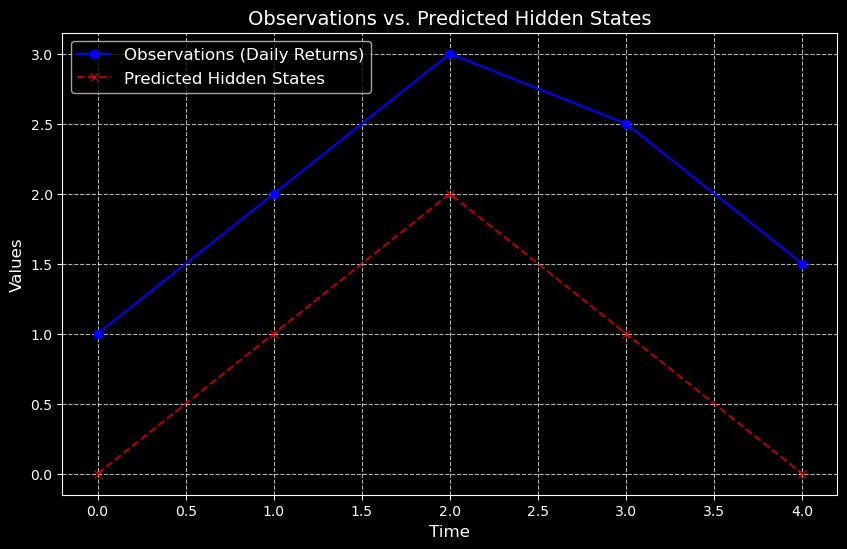

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))

plt.plot(observations, label="Observations (Daily Returns)", linestyle='-', marker='o', color='blue')
plt.plot(predicted_states, label="Predicted Hidden States", alpha=0.7, linestyle='--', marker='x', color='red')


plt.xlabel("Time", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Observations vs. Predicted Hidden States", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()
